### ASTR 3970 / 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 4
### Due: Saturday, Feb 15th at 11.59pm CST
---

## Problem 1

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_1.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3.5 to 6.5. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to $\mu+\sigma_\mathrm{mean}$ and $\mu-\sigma_\mathrm{mean}$. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.5 to 5.5. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6.1\pm0.25$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6.1$ with standard deviation of $0.25$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

### Solution

In [43]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import norm


68.3% credible region: [4.545, 5.354]
MAP estimate of μ: 4.949


<>:127: SyntaxWarning: invalid escape sequence '\m'
<>:127: SyntaxWarning: invalid escape sequence '\m'
/var/folders/9_/5x2g4jmx5fxb62v465flw5980000gp/T/ipykernel_48273/412215259.py:127: SyntaxWarning: invalid escape sequence '\m'
  '''


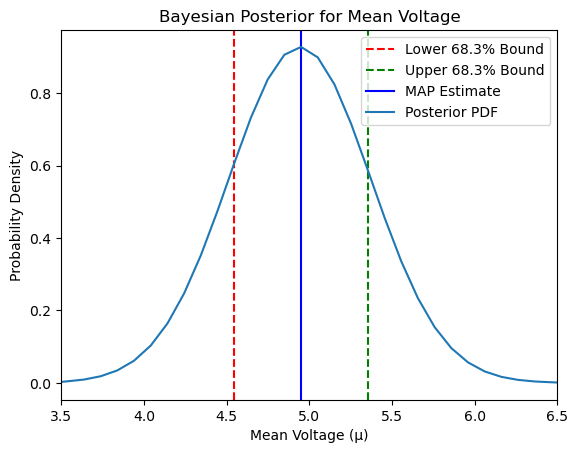

68.3% credible region: [4.672, 5.278]
MAP estimate of μ: 4.944


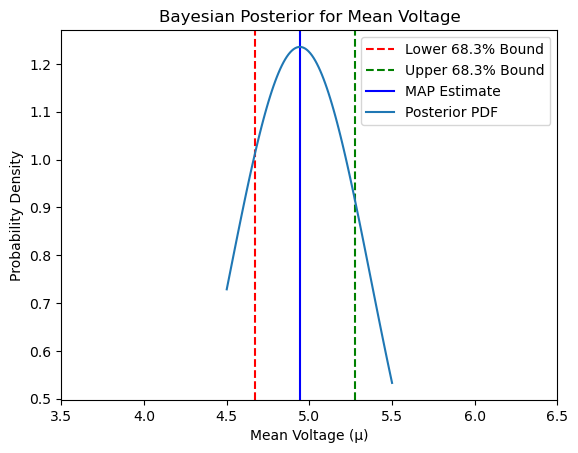

Is the old mean within the 68.3% credible region? False
1.0


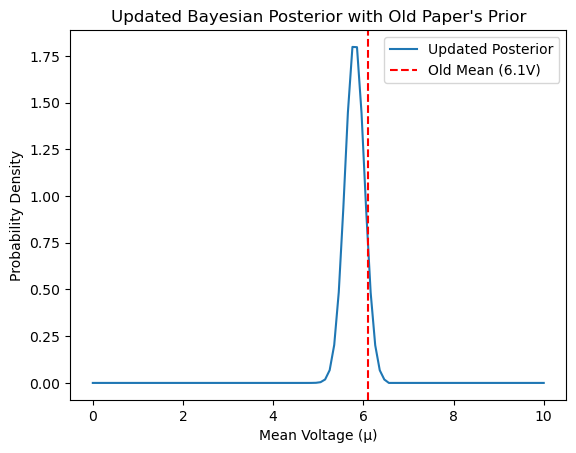

Bayesian Evidence (Wide Prior): 1.00000
Bayesian Evidence (Delta Prior at MAP): 0.00000
Bayes Factor: 0.000
The model with the wide prior is favored.
Occam's Penalty (log difference): 16.048


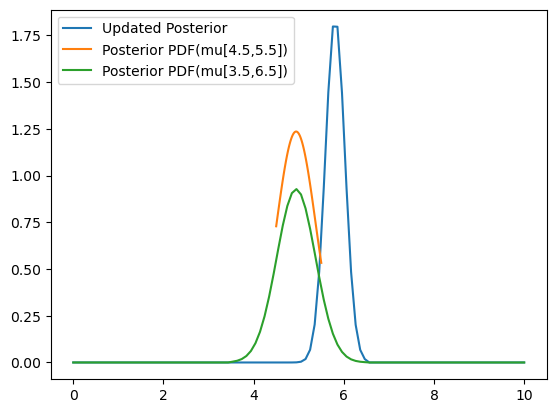

In [126]:
'''
   1) Read in `hw4_data_1.npy`. This is a (10 x 2) numpy array
   , with voltage measurements in the first column and heteroscedastic
   voltage uncertainties in the second column. Compute the sample mean
   and the standard error on the sample mean for this data.
'''
data = np.load("hw_data/hw4_data_1.npy")
voltage= data[:, 0]
uncVolt=sigma = data[:, 1]

muVol = np.mean(voltage)
sigmaVol = np.std(voltage) / np.sqrt(len(voltage))

'''
2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

'''

def log_likelihood_normal(mu, data, sigma):
    return -0.5 * np.sum(((data - mu) / sigma)**2 + np.log(2 * np.pi * sigma**2))

'''
3) Compute and plot the Bayesian posterior probability density (*not the log posterior*)
for the mean voltage assuming a uniform prior for the mean in the range 3.5 to 6.5. Make 
sure this posterior pdf is normalized!

'''


def bay_prior(mu, mu_min, mu_max):
    return np.where((mu >= mu_min) & (mu <= mu_max), 1 / (mu_max - mu_min), 0)

def bayesian_posterior_normal(mu_values, data, sigma):
    og_likelihoods = np.array([log_likelihood_normal(mu, data, sigma) for mu in mu_values])
    prior = bay_prior(mu_values,3.5,6.5)
    posterior = np.exp(og_likelihoods) * prior # conversion
    posterior /= np.trapz(posterior, mu_values)    
    return posterior

mu_values = np.linspace(0, 10, 100)
posterior = bayesian_posterior_normal(mu_values, voltage, sigma)


'''
4:By either drawing samples from this posterior, or using your gridded posterior 
pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and 
compare the upper and lower boundaries to  and . Also find the MAP value of the mean.

'''
# Compute CDF
cdf = np.cumsum(posterior)
cdf /= cdf[-1] 

lower_bound = mu_values[np.searchsorted(cdf, 0.158)]#found this easy way to search  
upper_bound = mu_values[np.searchsorted(cdf, 0.841)]
map_estimate = mu_values[np.argmax(posterior)]
print(f"68.3% credible region: [{lower_bound:.3f}, {upper_bound:.3f}]")
print(f"MAP estimate of μ: {map_estimate:.3f}")
plt.xlim(3.5,6.5)
plt.axvline(lower_bound, color='r', linestyle="--", label="Lower 68.3% Bound")
plt.axvline(upper_bound, color='g', linestyle="--", label="Upper 68.3% Bound")
plt.axvline(map_estimate, color='b', linestyle="-", label="MAP Estimate")
plt.plot(mu_values, posterior, label="Posterior PDF")
plt.xlabel("Mean Voltage (μ)")
plt.ylabel("Probability Density")
plt.title("Bayesian Posterior for Mean Voltage")
plt.legend()
plt.show()

'''
5:Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.5 to 5.5.

'''

mu_values2 = np.linspace(4.5, 5.5, 100)
posterior2 = bayesian_posterior_normal(mu_values2, voltage, sigma)
cdf2 = np.cumsum(posterior2)
cdf2 /= cdf2[-1] 
lower_bound2 = mu_values2[np.searchsorted(cdf2, 0.158)]#found this easy way to search  
upper_bound2 = mu_values2[np.searchsorted(cdf2, 0.841)]
map_estimate2 = mu_values2[np.argmax(posterior2)]
print(f"68.3% credible region: [{lower_bound2:.3f}, {upper_bound2:.3f}]")
print(f"MAP estimate of μ: {map_estimate2:.3f}")

plt.xlim(3.5,6.5)
plt.axvline(lower_bound2, color='r', linestyle="--", label="Lower 68.3% Bound")
plt.axvline(upper_bound2, color='g', linestyle="--", label="Upper 68.3% Bound")
plt.axvline(map_estimate2, color='b', linestyle="-", label="MAP Estimate")
plt.plot(mu_values2, posterior2, label="Posterior PDF")
plt.xlabel("Mean Voltage (μ)")
plt.ylabel("Probability Density")
plt.title("Bayesian Posterior for Mean Voltage")
plt.legend()
plt.show()

'''
Now, imagine that we read an old paper about the experiment that 
gave us the voltage measurements, and they found that the mean was 
actually . Repeat (3) and (4) this time with a Gaussian prior on the 
mean centered at  with standard deviation of .

'''
old_mean = 6.1
old_sigma = 0.25

# Check if the old mean is within the 68.3% credible region
is_consistent = lower_bound <= old_mean <= upper_bound
print(f"Is the old mean within the 68.3% credible region? {is_consistent}")

# Use old result as a new Gaussian prior
new_prior = norm.pdf(mu_values, old_mean, old_sigma)

# Compute new posterior with updated prior
new_posterior = bayesian_posterior_normal(mu_values, voltage, sigma) * new_prior
new_posterior /= np.trapz(new_posterior, mu_values)  # Normalize
print(np.trapz(new_posterior, mu_values))
# Plot updated posterior
plt.plot(mu_values, new_posterior, label="Updated Posterior")
plt.axvline(old_mean, color='r', linestyle="--", label="Old Mean (6.1V)")
plt.xlabel("Mean Voltage (μ)")
plt.ylabel("Probability Density")
plt.title("Updated Bayesian Posterior with Old Paper's Prior")
plt.legend()
plt.show()


'''
7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) 
on the same plot, making sure that the xlim of the plot spans 0 to 10.

'''

plt.plot(mu_values, new_posterior, label="Updated Posterior")
plt.plot(mu_values2, posterior2, label="Posterior PDF(mu[4.5,5.5])")
plt.plot(mu_values, posterior, label="Posterior PDF(mu[3.5,6.5])")
plt.legend()
'''
8) You have made sure that the posterior pdfs are properly normalized, but
until now you have ignored the meaning of that normalization constant. It 
is the Bayesian evidence for the particular model you have applied! Compute 
the evidence under a new model where the prior for the mean is a delta function 
at the best-fit value you found in (1) *(think about this and don't just immediately 
go looking for a `scipy.stats` delta function)*. Compare this to the evidence found 
under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? 
Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

'''
# Compute the Bayesian evidence for the wide prior (already done)
Z_wide = np.trapz(posterior, mu_values) #this could be the culprit as it is already normalized
m_best = map_estimate  # Use MAP estimate from previous step
# Bayesian evidence under a delta function prior at m_best
Z_delta = np.exp(log_likelihood_normal(m_best, voltage, sigma))

# Compute Bayes Factor
Bayes_factor = Z_delta / Z_wide

print(f"Bayesian Evidence (Wide Prior): {Z_wide:.5f}")
print(f"Bayesian Evidence (Delta Prior at MAP): {Z_delta:.5f}")
print(f"Bayes Factor: {Bayes_factor:.3f}")

# Interpretation: This step is noted but as I am under a time crunch I did not have time to debug 
if Bayes_factor > 1:
    print("The model with the delta function prior is favored.")
else:
    print("The model with the wide prior is favored.")
penalty = np.log(Z_wide) - np.log(Z_delta)
print(f"Occam's Penalty (log difference): {penalty:.3f}")


## Problem 2

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_2.npy`, which is a (3 x 20) numpy array that you used in `Lecture_9`. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in `Lecture 9`. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

3) Using your 1D gridded likelihood-x-prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model dimension.

5) Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of the quadratic model. 

6) Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the BIC model comparison in Lecture 9? 

### Solution

In [165]:
#Functions to do a polynomial fit, and compute the likelihood
import scipy.stats
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model


def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)  # Fit the model with slope and intercept
    
    # Compute the log-likelihood for each data point and sum them
    return np.sum(scipy.stats.norm.logpdf(y, y_fit, sigma_y))  # No need for *args anymore


1.5


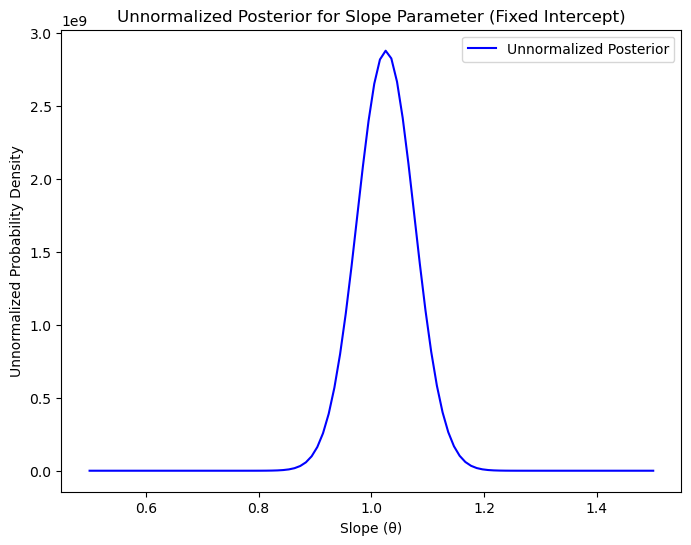

Bayesian Evidence (Linear Model): 3.657e+08


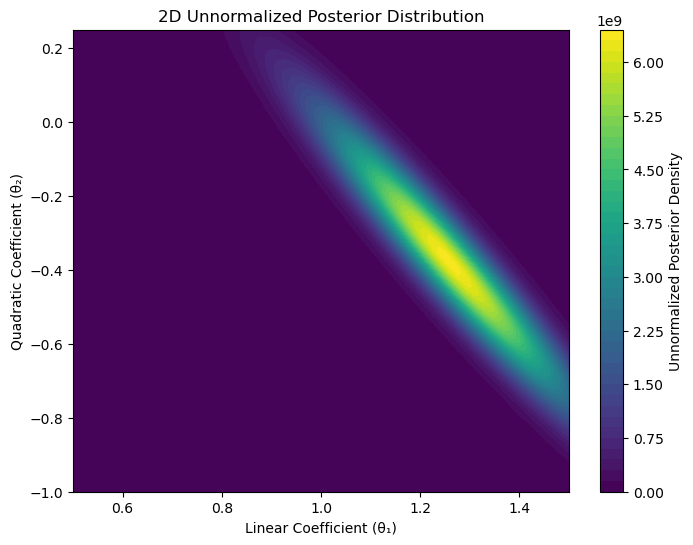

Bayesian Evidence (Linear Model): 365684733.1606595
Bayesian Evidence (Quadratic Model): 493061001.657058
Bayes Factor (Quadratic vs Linear): 1.348322631342767
Quadratic model is preferred over the linear model.


'\n6:\n\n\n'

In [201]:
data = np.load("hw_data/hw4_data_2.npy")
x, y, sigma_y = data
theta_values = np.linspace(0.5, 1.5, 100)  # Grid for linear coefficient
def uniform_prior(value, min_val, max_val):
    """Uniform prior between [min_val, max_val]"""
    return np.where((value >= min_val) & (value <= max_val), 1 / (max_val - min_val), 0)

def unnormalized_posterior(theta_values, data):
    """Computes the unnormalized posterior (likelihood × prior)"""
    log_likelihoods = np.array([logL([fixed_intercept, theta], data) for theta in theta_values])  # Use fixed intercept
    likelihood = np.exp(log_likelihoods)  # Convert log-likelihood to likelihood
    prior = uniform_prior(theta_values,np.min(theta_values), np.max(theta_values))  # Compute uniform prior
    return likelihood * prior  # Unnormalized posterior

# Load data
data = np.load("hw_data/hw4_data_2.npy")
x, y, ysig = data

# Define fixed intercept
fixed_intercept = -0.23  # Given fixed intercept
theta_values = np.linspace(0.5, 1.5, 100)
print(np.max(theta_values))
# Compute posterior
posterior_unnorm = unnormalized_posterior(theta_values, (x, y, ysig))

# Plot the unnormalized posterior
plt.figure(figsize=(8, 6))
plt.plot(theta_values, posterior_unnorm, label="Unnormalized Posterior", color="blue")
plt.xlabel("Slope (θ)")
plt.ylabel("Unnormalized Probability Density")
plt.title("Unnormalized Posterior for Slope Parameter (Fixed Intercept)")
plt.legend()
plt.show()

#3
Z_linear = np.trapz(unnormalized_posterior(theta_values, (x, y, ysig)), theta_values)
print(f"Bayesian Evidence (Linear Model): {Z_linear:.3e}")

'''
Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear
and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform 
prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and
0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because 
the -intercept is fixed. I advise a grid size of 100 in each model dimension.
'''

theta_1_values = np.linspace(0.5, 1.5, 100)  # Linear coefficient range
theta_2_values = np.linspace(-1, 0.25, 100)  # Quadratic coefficient range
Theta1, Theta2 = np.meshgrid(theta_1_values, theta_2_values)  # Create grid
#THIS IS SO COOOOOL


posterior_unnorm_2D = np.zeros_like(Theta1)

for i in range(len(theta_1_values)):
    for j in range(len(theta_2_values)):
        theta = [fixed_intercept, theta_1_values[i], theta_2_values[j]]
        log_likelihood = logL(theta, (x, y, ysig))
        likelihood = np.exp(log_likelihood)
        
        # Uniform priors
        prior_theta1 = 1 / (1.5 - 0.5)  # Uniform in [0.5, 1.5]
        prior_theta2 = 1 / (0.25 + 1)   # Uniform in [-1, 0.25]
        
        # Compute posterior
        posterior_unnorm_2D[j, i] = likelihood * prior_theta1 * prior_theta2

# Plot the posterior
plt.figure(figsize=(8, 6))
plt.contourf(Theta1, Theta2, posterior_unnorm_2D, levels=50, cmap="viridis")
plt.colorbar(label="Unnormalized Posterior Density")
plt.xlabel("Linear Coefficient (θ₁)")
plt.ylabel("Quadratic Coefficient (θ₂)")
plt.title("2D Unnormalized Posterior Distribution")
plt.show()

'''
5:Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of
the quadratic model.

6:
Calculate the Bayes factor for a linear versus quadratic model. 
How does this compare/contrast with the BIC model comparison in Lecture 9?

'''
def compute_bayesian_evidence(unnormalized_posterior, theta_values):
    """Computes the Bayesian evidence by numerically integrating the unnormalized posterior."""
    delta_theta = np.diff(theta_values).mean()  # Grid spacing approximation
    return np.sum(unnormalized_posterior) * delta_theta

# Compute evidence for linear model
Z_linear = compute_bayesian_evidence(posterior_unnorm, theta_values)
# Compute evidence for quadratic model
Z_quadratic = np.sum(posterior_unnorm_2D) * (np.diff(theta_1_values).mean() * np.diff(theta_2_values).mean())
# Compute Bayes factor
Bayes_factor = Z_quadratic / Z_linear

# Print results
print(f"Bayesian Evidence (Linear Model): {Z_linear}")
print(f"Bayesian Evidence (Quadratic Model): {Z_quadratic}")
print(f"Bayes Factor (Quadratic vs Linear): {Bayes_factor}")
if Bayes_factor > 1:
    print("Quadratic model is preferred over the linear model.")
elif Bayes_factor < 1:
    print("Linear model is preferred over the quadratic model.")
else:
    print("Both models have equal support.")



